# TASK 3

In [50]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
df = pd.read_csv(R'C:\Users\Sanya srivastava\Desktop\Data project\Banking.csv')

In [52]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [53]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45205,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
45206,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45207,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45208,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45209,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [54]:
df.shape

(45210, 17)

In [55]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [56]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [57]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

numerical_cols = df.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [58]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000,45210.000000
mean,40.938465,1362.333024,15.806923,258.155342,2.763791,40.187879,0.580513
std,10.619311,3044.781647,8.322310,257.522333,3.098059,100.112791,2.303843
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.500000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [59]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45210,45210,45210,45210,45210,45210,45210,45210,45210,45210
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9731,27216,23201,44395,25130,37966,29288,13766,36959,39917


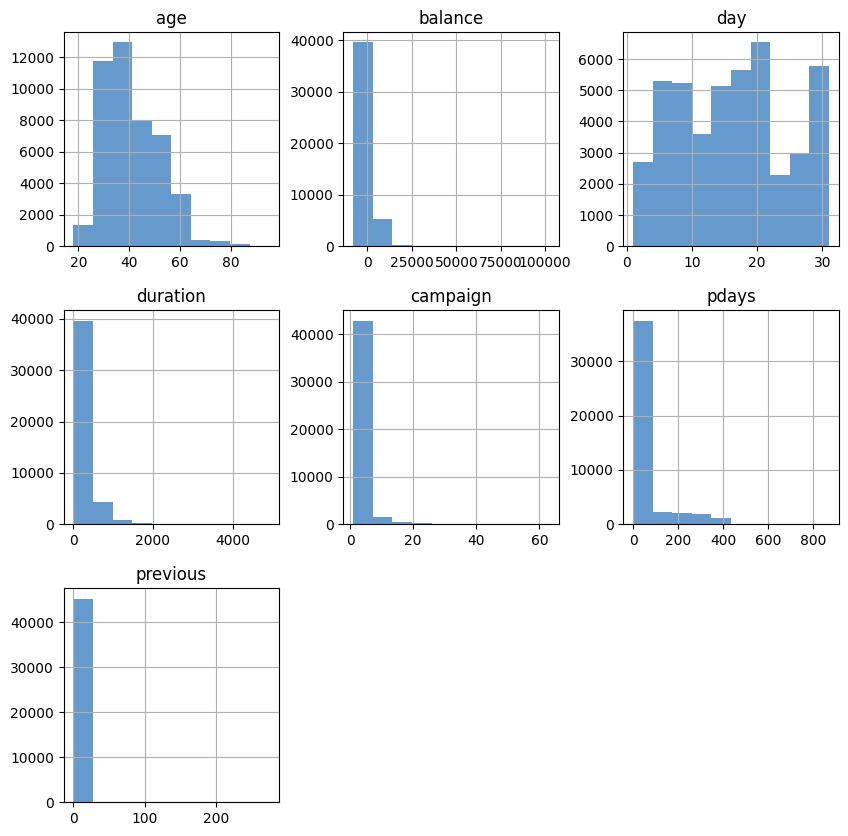

In [60]:
df.hist(figsize=(10,10),color='#6699CC')
plt.show()

In [61]:
num_plots = len(categorical_cols)
num_rows = (num_plots + 1) // 2 
num_cols = 2

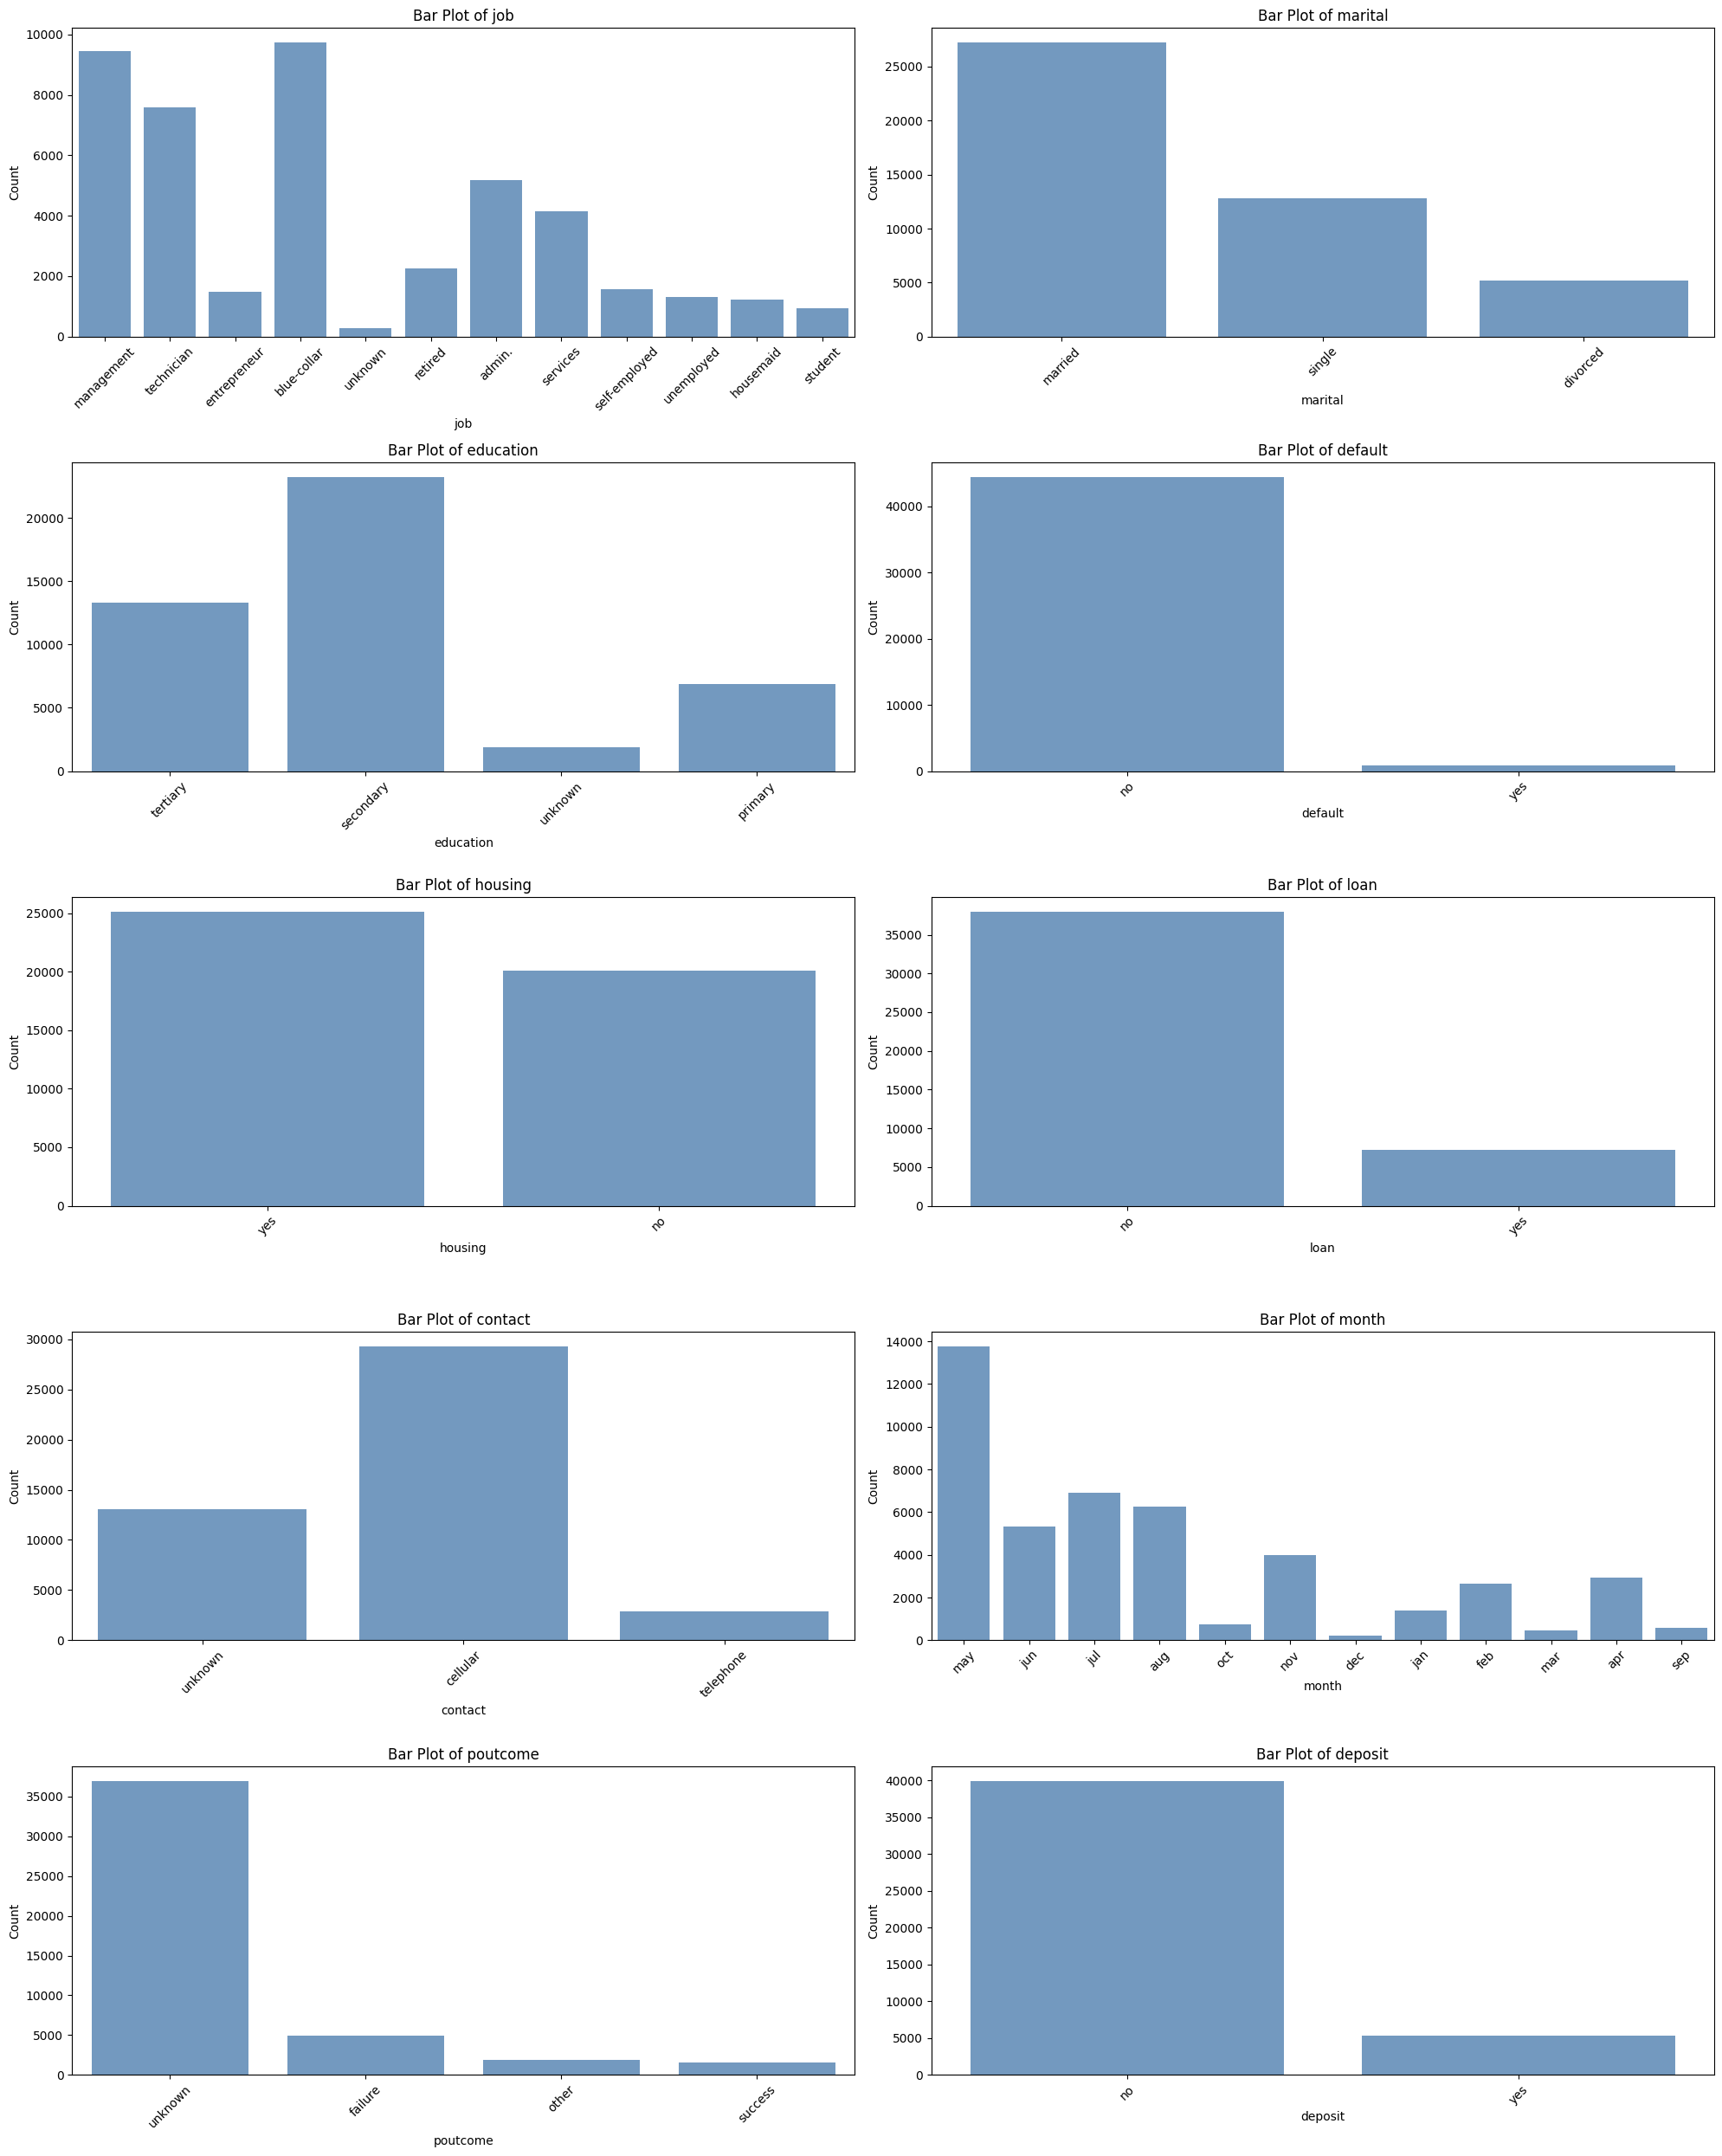

In [62]:
plt.figure(figsize=(20, 25))
for i, feature in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df, color='#6699CC')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

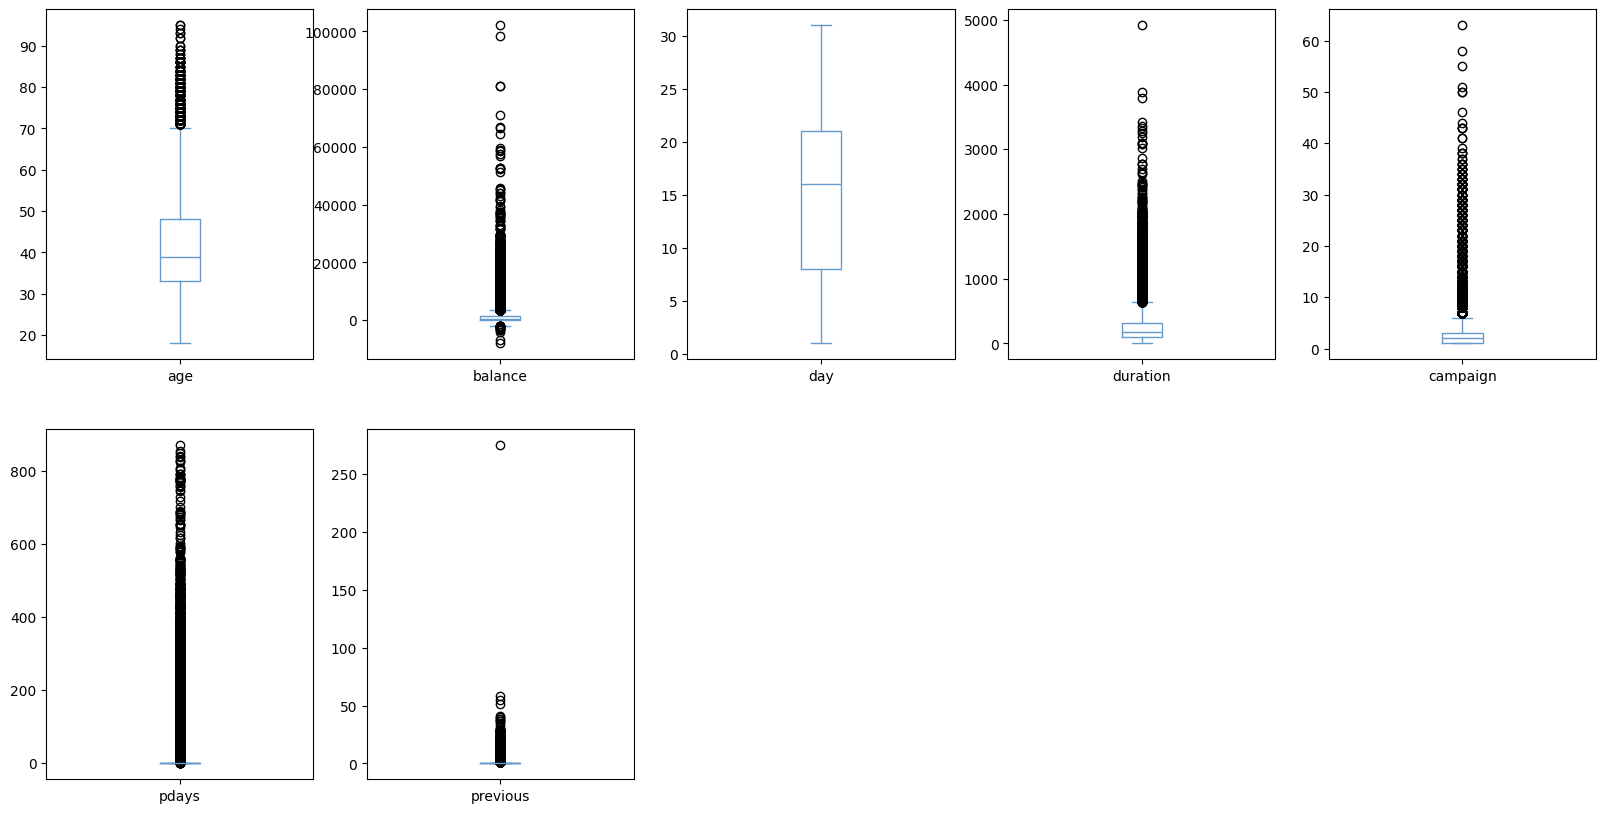

In [63]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#6699CC')
plt.show()

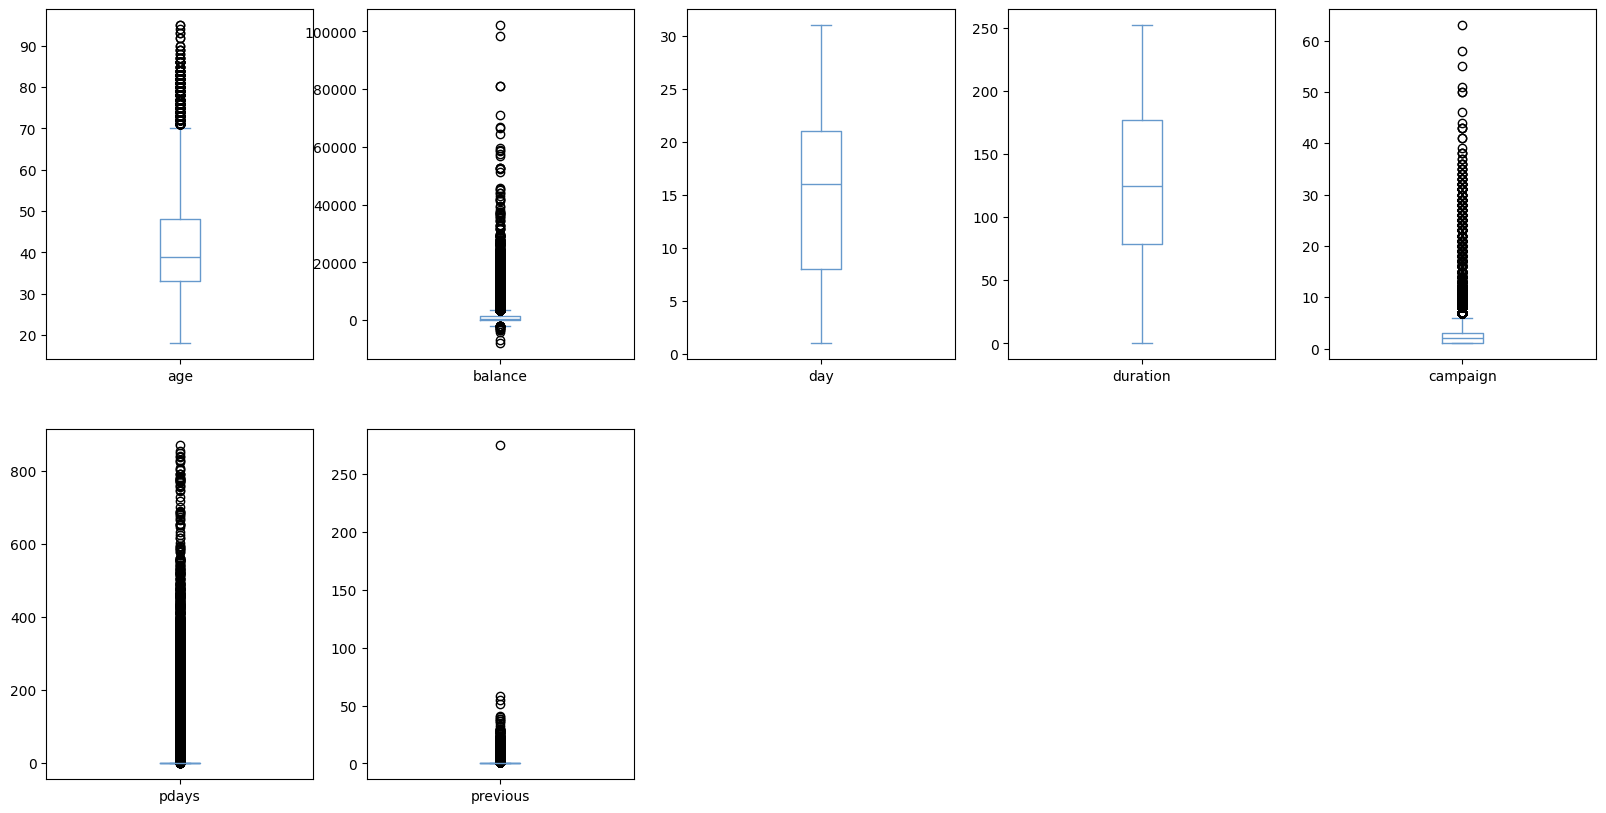

In [64]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]
     

df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#6699CC')
plt.show()

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097797 -0.009113 -0.007823  0.004648 -0.023812  0.001727
balance   0.097797  1.000000  0.004510  0.007914 -0.014586  0.003428  0.016702
day      -0.009113  0.004510  1.000000 -0.073531  0.162470 -0.093007 -0.051685
duration -0.007823  0.007914 -0.073531  1.000000 -0.215049  0.017693  0.003867
campaign  0.004648 -0.014586  0.162470 -0.215049  1.000000 -0.088595 -0.032902
pdays    -0.023812  0.003428 -0.093007  0.017693 -0.088595  1.000000  0.454818
previous  0.001727  0.016702 -0.051685  0.003867 -0.032902  0.454818  1.000000


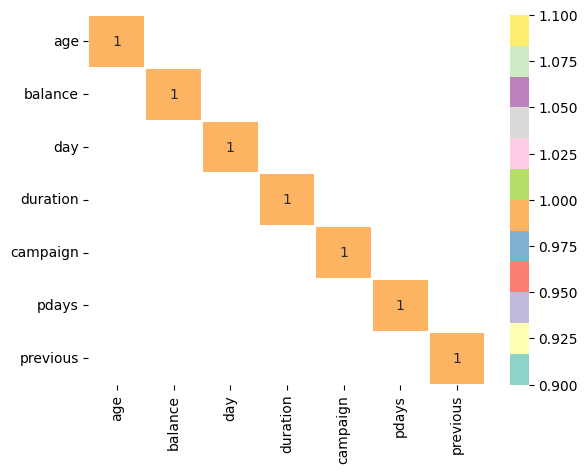

In [65]:
numeric_df = df.drop(columns=categorical_cols)

corr = numeric_df.corr()

print(corr)

corr = corr[abs(corr) >= 0.90]

sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

In [66]:
df1 = df.copy()
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,40,4,1,2,0,3036,1,0,2,4,8,253,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,11,4,2,2,0,1681,0,0,0,15,9,238,0,0,0,3,1
45206,50,5,1,1,0,2062,0,0,0,15,9,212,0,184,6,2,1
45207,35,4,1,2,0,1499,0,0,0,16,9,226,0,181,4,2,1
45208,55,5,1,1,0,3678,0,0,0,16,9,253,0,37,8,0,1


In [67]:
df_encoded['deposit'].value_counts()

deposit
0    39917
1     5293
Name: count, dtype: int64

In [68]:
x = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']
print(x.shape)
print(y.shape)

(45210, 16)
(45210,)


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33907, 16)
(11303, 16)
(33907,)
(11303,)


In [70]:
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)
    print('Testing Score',test_score)

In [71]:
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [72]:
mscore(dt)

Training Score 0.8933848467867992
Testing Score 0.8918871096169159


In [73]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [74]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8918871096169159
Confusion Matrix
 [[9861  128]
 [1094  220]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      9989
           1       0.63      0.17      0.26      1314

    accuracy                           0.89     11303
   macro avg       0.77      0.58      0.60     11303
weighted avg       0.87      0.89      0.86     11303



In [75]:
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


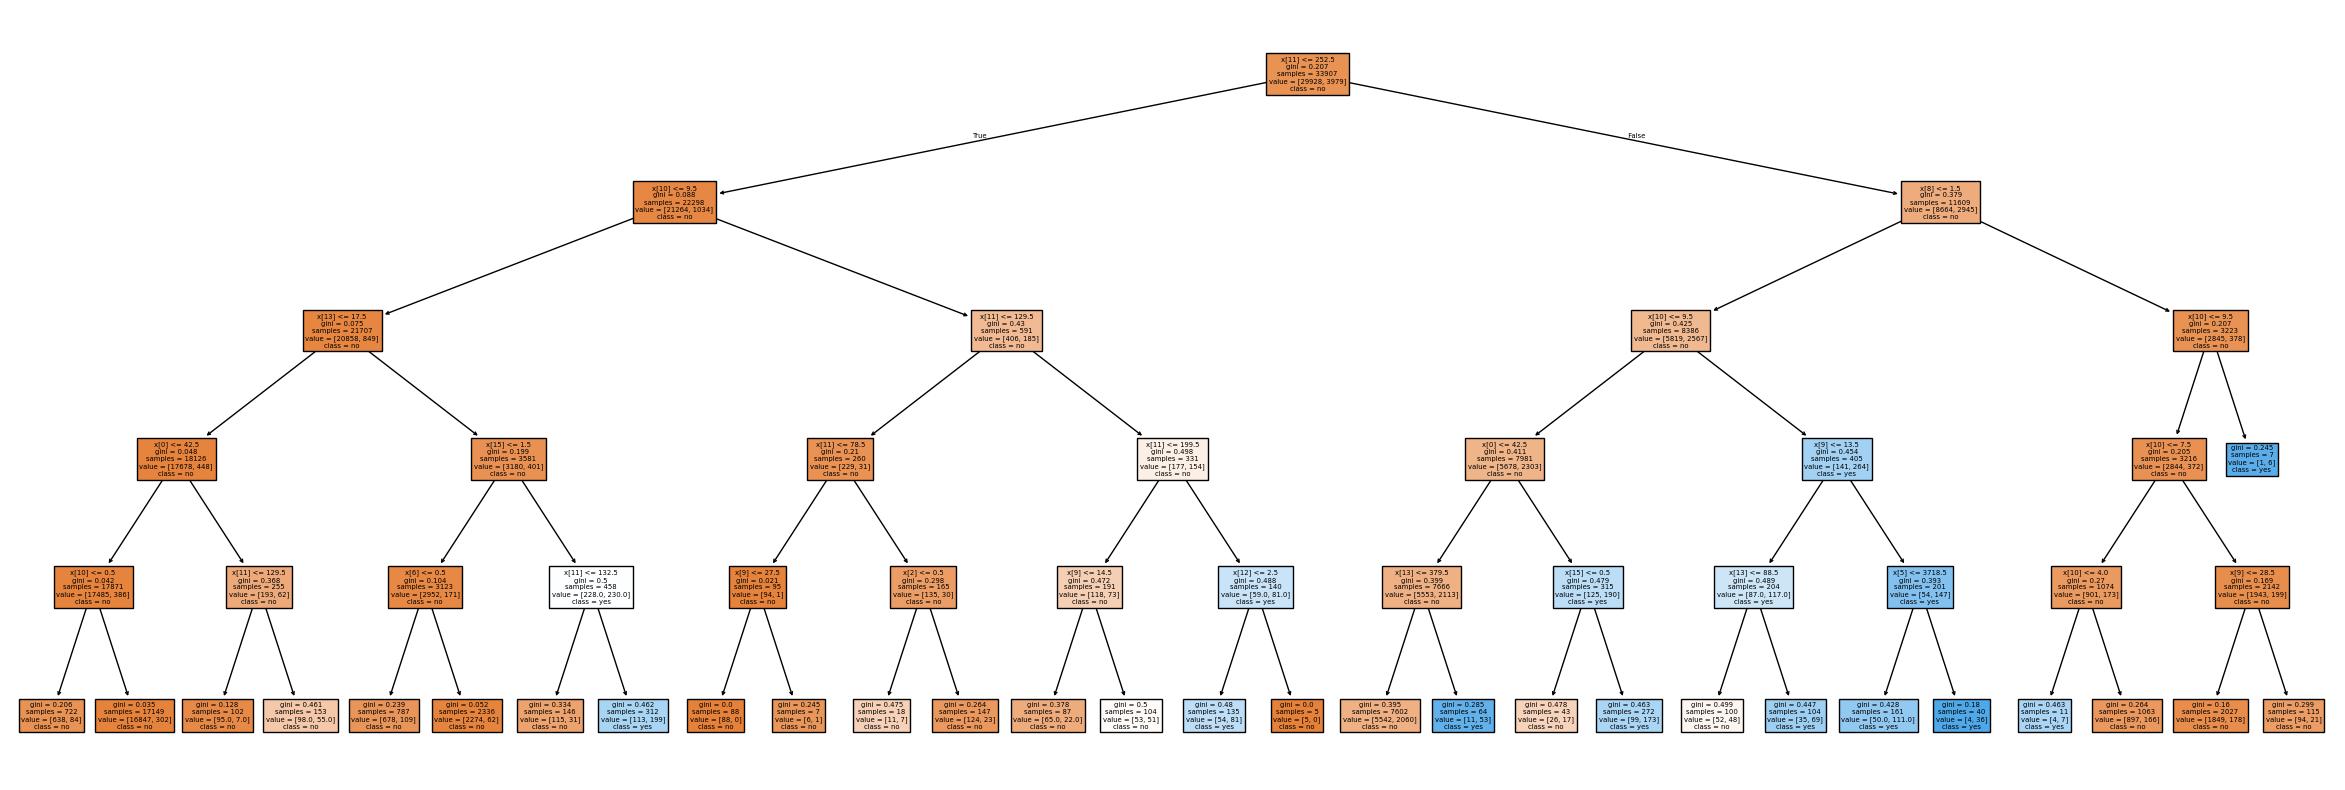

In [76]:
plt.figure(figsize=(30,10))
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [78]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [79]:
mscore(dt1)

Training Score 0.8917332704161383
Testing Score 0.8914447491816332


In [81]:
ypred_dt1 = dt1.predict(x_test)
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.8914447491816332
Confusion Matrix
 [[9849  140]
 [1087  227]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      9989
           1       0.62      0.17      0.27      1314

    accuracy                           0.89     11303
   macro avg       0.76      0.58      0.61     11303
weighted avg       0.87      0.89      0.86     11303



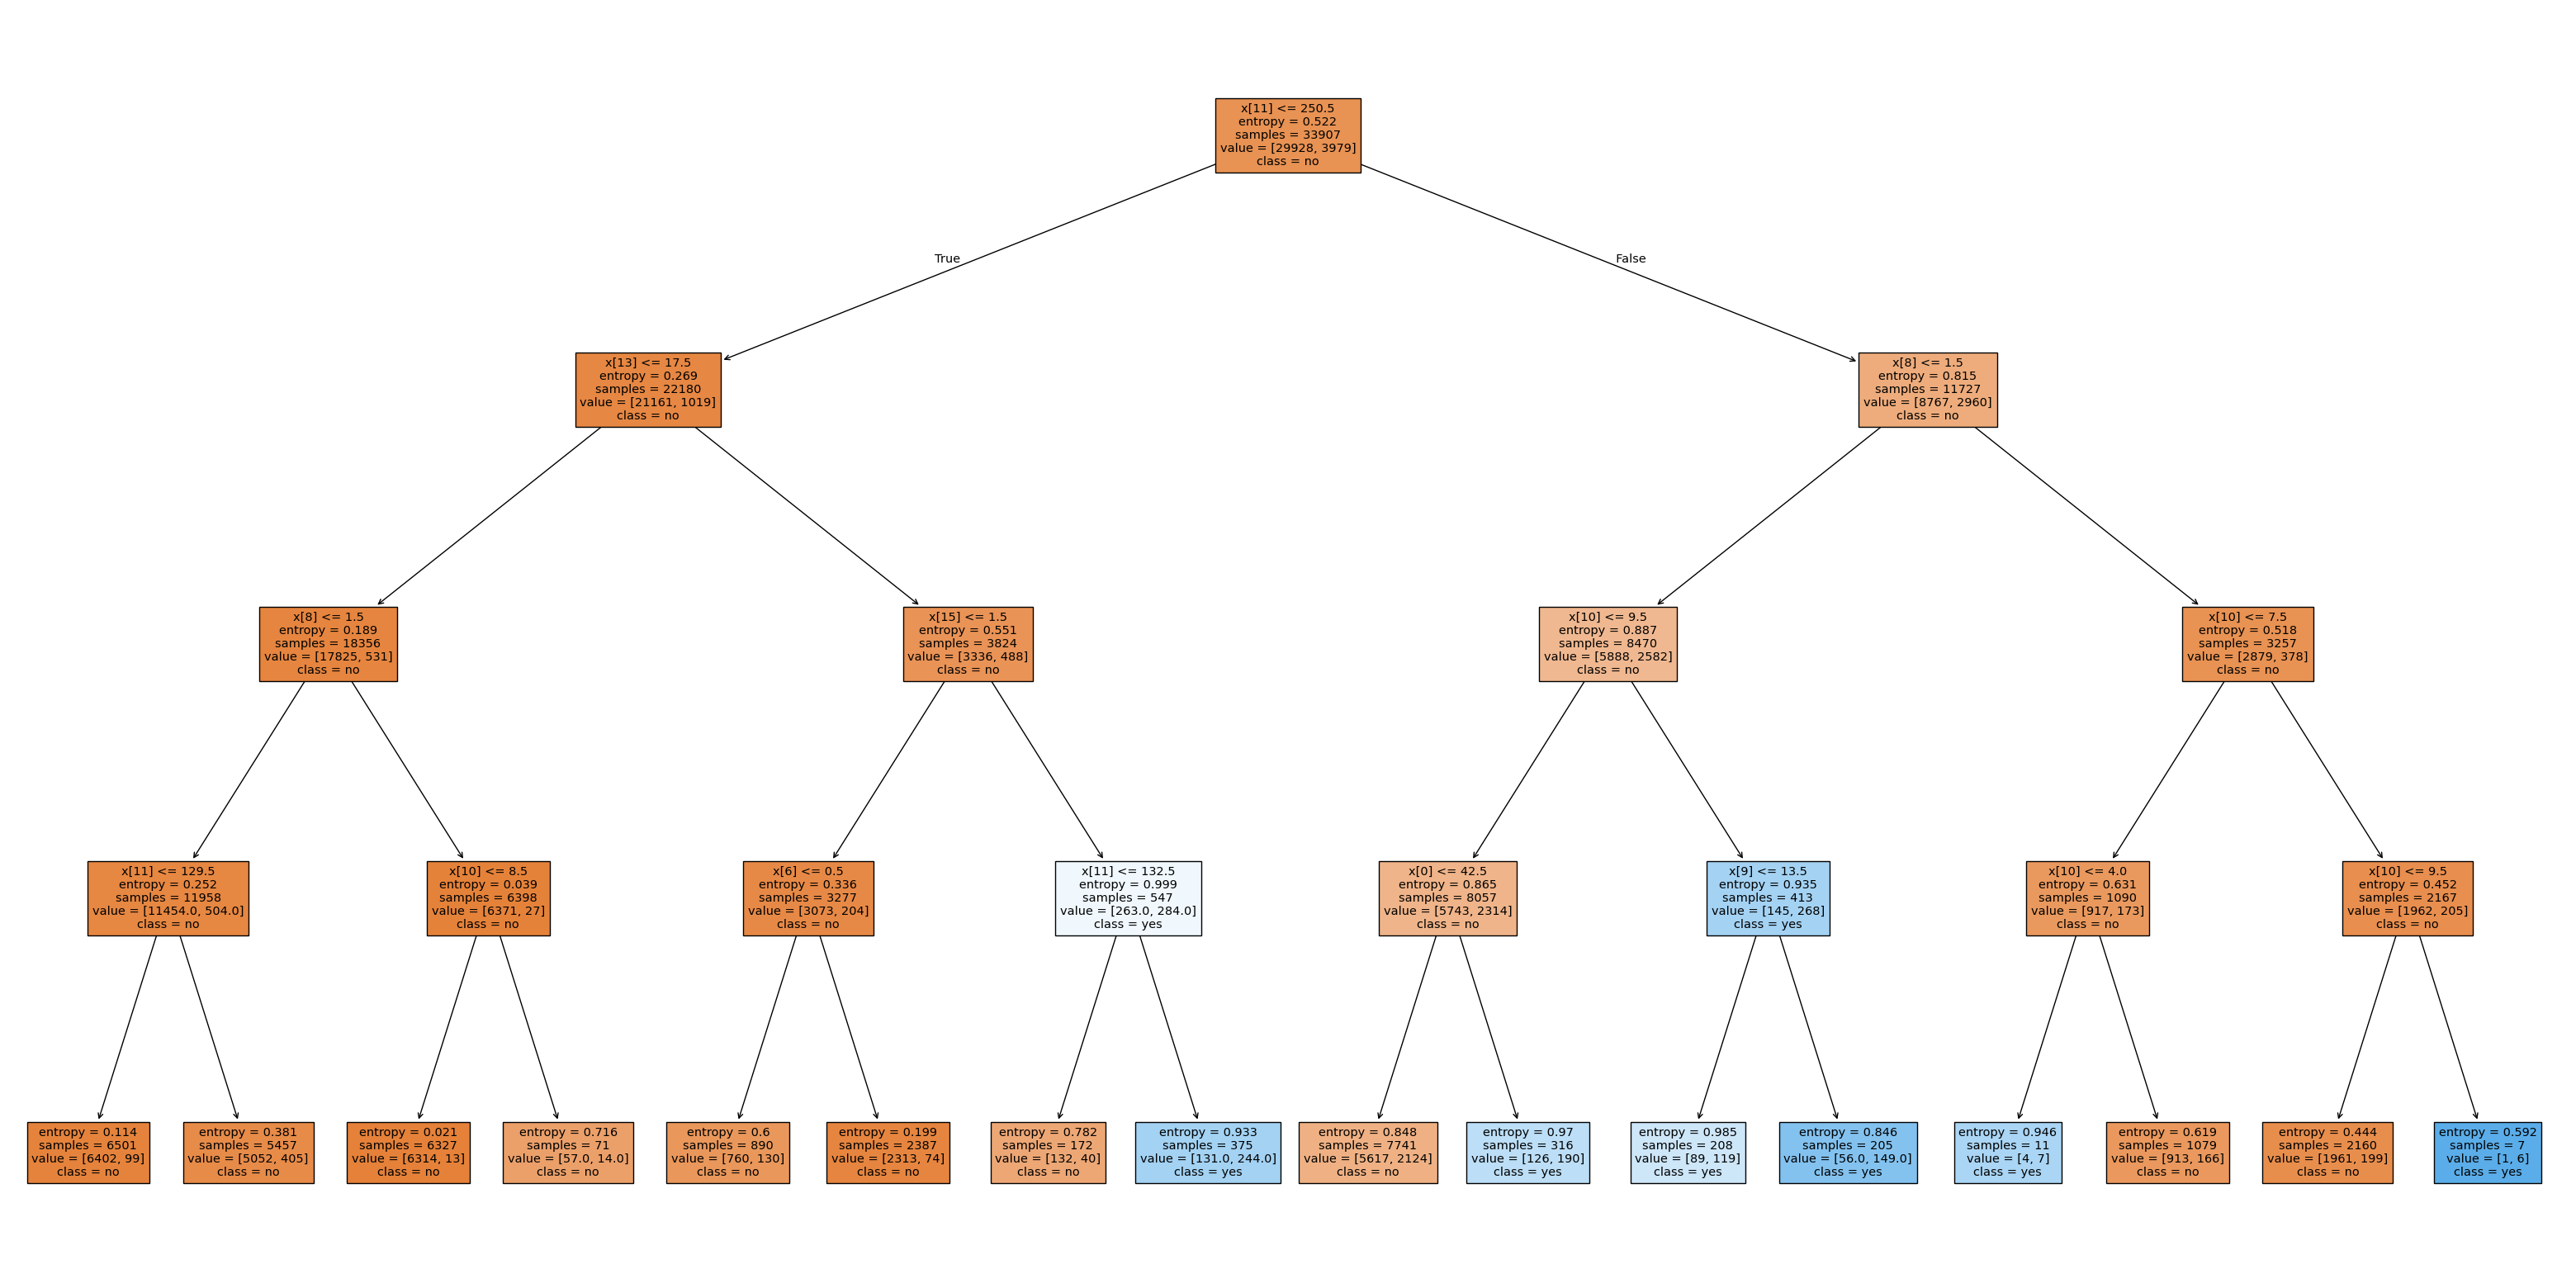

In [82]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()